<a href="https://colab.research.google.com/github/dedemasutti/Python-para-mercado-financeiro/blob/main/Previs%C3%A3o_de_a%C3%A7%C3%B5es_utilizando_uma_rede_neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Imports e instalações de bibliotecas

In [1]:
!pip install yfinance
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

Pré processamento dos dados

In [2]:
# Definir o ticker da ação que você deseja analisar
ticker = 'PETR4.SA'  # Ticker da Petrobras

# Coletar dados históricos de preços usando o Yahoo Finance
data = yf.download(ticker, start='2010-01-01', end='2023-01-01')

# Selecionar a coluna de preços de fechamento para análise
data = data['Close']

[*********************100%%**********************]  1 of 1 completed


Normalizando os dados e dividindo entre treino e teste

In [3]:

scaler = MinMaxScaler(feature_range=(0, 1))
data_scaled = scaler.fit_transform(data.values.reshape(-1, 1))


train_size = int(len(data_scaled) * 0.8)
train_data, test_data = data_scaled[:train_size], data_scaled[train_size:]

Criando o modelo com LSTM

In [4]:
# Criar sequências de dados para treinamento
def create_sequences(data, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(data[i+sequence_length])
    return np.array(X), np.array(y)

sequence_length = 10  # Tamanho da sequência de entrada
X_train, y_train = create_sequences(train_data, sequence_length)
X_test, y_test = create_sequences(test_data, sequence_length)

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(sequence_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

Treinando o modelo

In [5]:
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
81/81 [==============================] - 3s 7ms/step - loss: 0.0432
Epoch 2/50
81/81 [==============================] - 1s 7ms/step - loss: 8.1615e-04
Epoch 3/50
81/81 [==============================] - 1s 9ms/step - loss: 7.1927e-04
Epoch 4/50
81/81 [==============================] - 1s 11ms/step - loss: 6.5792e-04
Epoch 5/50
81/81 [==============================] - 1s 11ms/step - loss: 6.1376e-04
Epoch 6/50
81/81 [==============================] - 1s 11ms/step - loss: 5.8377e-04
Epoch 7/50
81/81 [==============================] - 1s 8ms/step - loss: 5.5216e-04
Epoch 8/50
81/81 [==============================] - 1s 7ms/step - loss: 5.1993e-04
Epoch 9/50
81/81 [==============================] - 1s 7ms/step - loss: 4.9625e-04
Epoch 10/50
81/81 [==============================] - 1s 7ms/step - loss: 4.7005e-04
Epoch 11/50
81/81 [==============================] - 1s 7ms/step - loss: 4.6333e-04
Epoch 12/50
81/81 [==============================] - 1s 7ms/step - loss: 4.4807e-04
Ep

Faz as predições

In [6]:
y_pred = model.predict(X_test)

20/20 [==============================] - 0s 3ms/step


Desnormalizando as predições

In [7]:
# A desnormalização é realizada no código para transformar as previsões de preços de ações,
#que foram normalizadas para facilitar o treinamento do modelo, de volta para a escala original dos preços reais,
# permitindo uma interpretação direta e comparável com os valores reais das ações.
y_pred = scaler.inverse_transform(y_pred)
y_test = scaler.inverse_transform(y_test)

Mean Square Error

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")


Mean Squared Error: 0.64763794979241


Gráficos

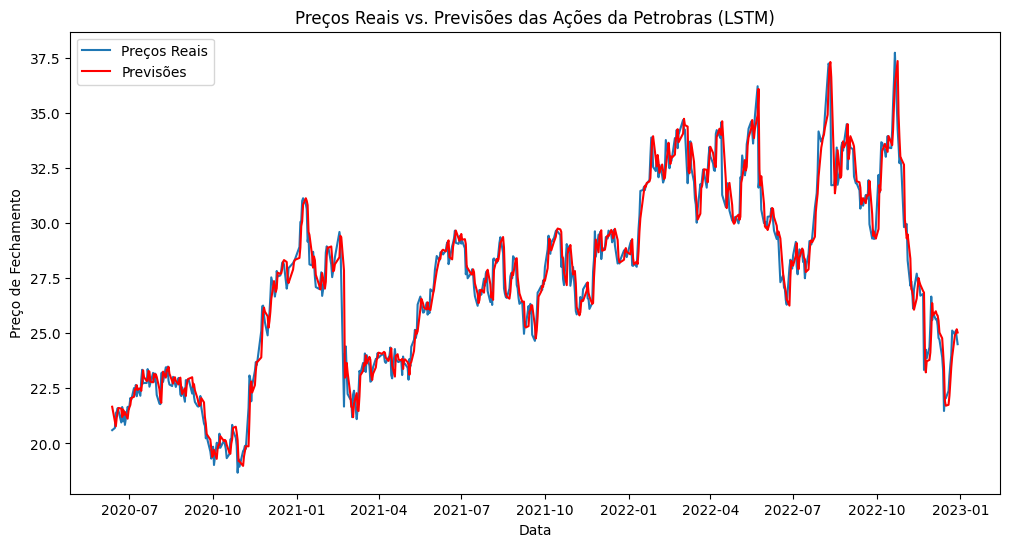

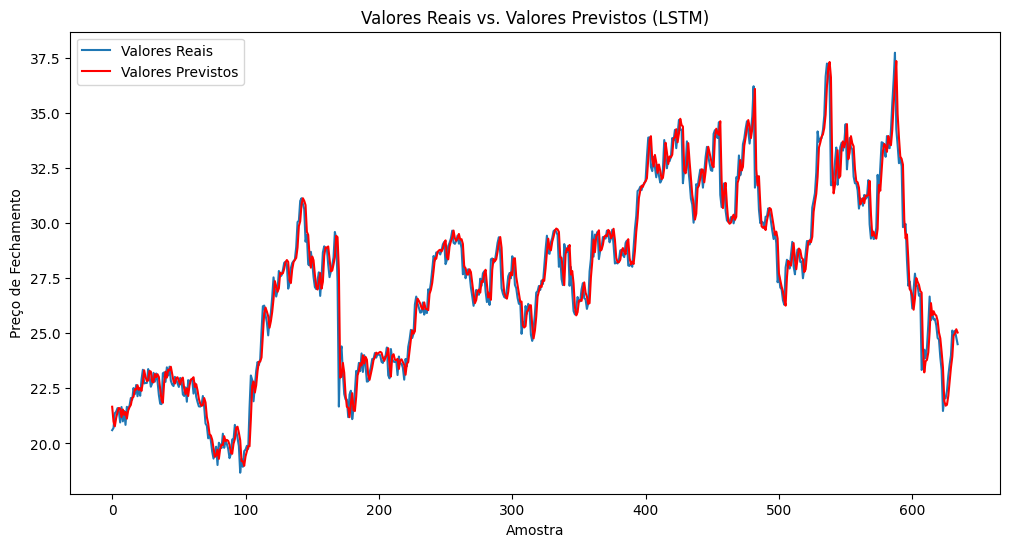

In [9]:
# Visualizar preços reais vs. preços previstos ao longo do tempo
plt.figure(figsize=(12, 6))
plt.plot(data.index[-len(y_test):], y_test, label='Preços Reais')
plt.plot(data.index[-len(y_test):], y_pred, color='red', label='Previsões')
plt.title('Preços Reais vs. Previsões das Ações da Petrobras (LSTM)')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()

# Gráfico comparando valores reais e previstos
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Valores Reais')
plt.plot(y_pred, color='red', label='Valores Previstos')
plt.title('Valores Reais vs. Valores Previstos (LSTM)')
plt.xlabel('Amostra')
plt.ylabel('Preço de Fechamento')
plt.legend()
plt.show()